In [556]:
#For environment
from tqdm import tqdm
import time
import datetime
from datetime import date
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

#Main libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from numpy import where
from collections import Counter
from numpy import mean

#Pre-proccessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#Normalization
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Classifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Sampling
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

#Metrics
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [369]:
#Import data
df=pd.read_csv('datasets/Fraud_Data.csv')
ip=pd.read_csv('datasets/IpAddress_to_Country.csv')

In [370]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [371]:
ip

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [372]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


# Find countries according to ip address


For each user, determine the country of origin from their IP address

In [373]:
def find_country(ip_address):
    try:
        mask=ip[(ip['lower_bound_ip_address'] < ip_address) & (ip['upper_bound_ip_address'] > ip_address)]
        return mask['country'].iloc[0]
    except:
        return "unknown"

In [374]:
df['country']=df['ip_address'].apply(lambda x: find_country(x))

Let's see how many unique countries we have:

In [375]:
df['country'].value_counts()

United States     58049
unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Yemen                 1
Vanuatu               1
San Marino            1
Burundi               1
Saint Martin          1
Name: country, Length: 182, dtype: int64

In [376]:
df['country'].nunique()

182

Looks like we have unique too many unique countries. Let's group this.

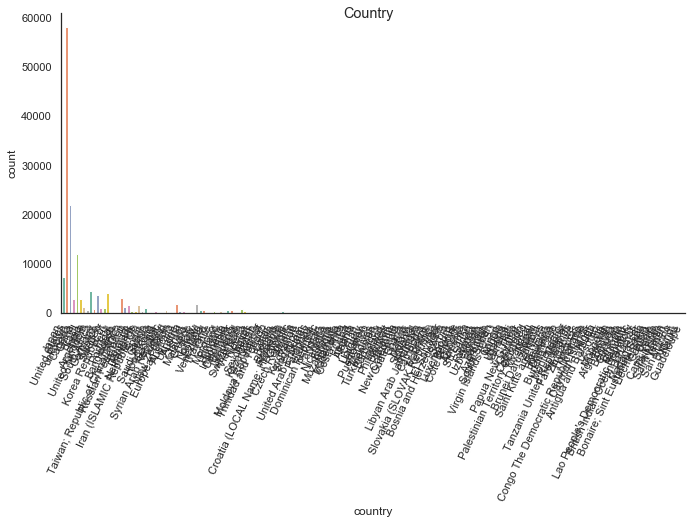

In [377]:
figure = sns.catplot(
    data=df,
    x='country',
    kind='count',
    palette='Set2',
    aspect=2.0,
    legend="True"
)
figure.fig.suptitle('Country')
figure.set_xticklabels(rotation=65, horizontalalignment='right')

Let's replace countries have less than 8 times with naming 'minority'.

In [378]:
#Finding the minority countries:
list_c=df.groupby('country').filter(lambda x: len(x) < 8)['country'].unique()

#Create a function replace minority countries with 'minority' name.
def replace_cntry(x):
    if x in list_c:
        return 'minority'
    else:
        return x

#Replace the countries
df['country']=df['country'].apply(lambda x:replace_cntry(x))

In [379]:
df['country'].value_counts()

United States     58049
unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Gabon                 9
Cuba                  9
Honduras              9
Senegal               9
Barbados              9
Name: country, Length: 127, dtype: int64

Let's find if there is any missing Values

In [215]:
df.isnull().values.any()

False

Lucky!

# 1.Let's get an insight of the dataset

**How much fraud we have:**

In [216]:
df['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

136961 non-frauds, 14151 frauds we have.

In [217]:
df['class'].value_counts()/df['class'].value_counts().sum()

0    0.906354
1    0.093646
Name: class, dtype: float64

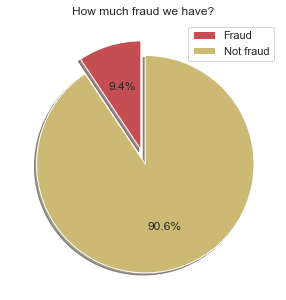

In [218]:
mask=df['class']==1
fraud_plot=len(df[mask])
not_fraud_plot=len(df['class'])-fraud_plot
sizes=(fraud_plot,not_fraud_plot)
explode=(0.07,0.07)

plt.figure(figsize=(5,5))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=['r','y'])
plt.legend(["Fraud","Not fraud"])
plt.title("How much fraud we have?")
plt.show()

We have 9.4% fraud which is very high in real life. Usually, frauds are 3% .

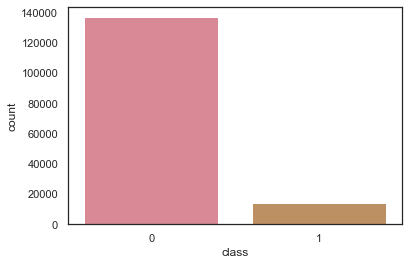

In [255]:
sns.countplot('class', data=df, palette=sns.husl_palette(9, s=0.7 ))

Unabalanced data, we see.

**How much repetitive fraudsters we have?**

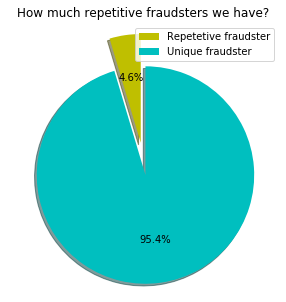

In [17]:
mask=df['class']==1
unique_device=len(df[mask]['device_id'].value_counts())/len(df['class'])
rep_device=1-unique_device
sizes=(unique_device, rep_device)
explode=(0.15,0.15)

plt.figure(figsize=(5,5))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=['y','c'])
plt.legend(["Repetetive fraudster","Unique fraudster"])
plt.title("How much repetitive fraudsters we have?")
plt.show()

We have 4.6% repetetive fraudsters, we should learn the lessons.

**Let's see purchase value(a.k.a price)**

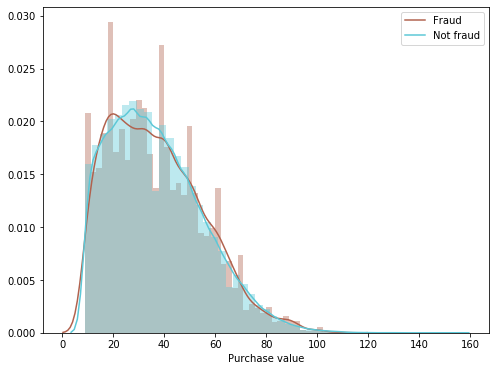

In [18]:
plt.figure(figsize=(8,6))
mask1=df['class']==1
mask2=df['class']==0
sns.distplot(df[mask1]['purchase_value'],
             kde_kws={"color": "#B1624EFF", "label": "Fraud"},
            color="#B1624EFF")
sns.distplot(df[mask2]['purchase_value'], 
             kde_kws={"color": "#5CC8D7FF", "label": "Not fraud"},
             color="#5CC8D7FF")
plt.xlabel("Purchase value")
plt.show()

It seems Fraud or not, customers buy between 20-40.

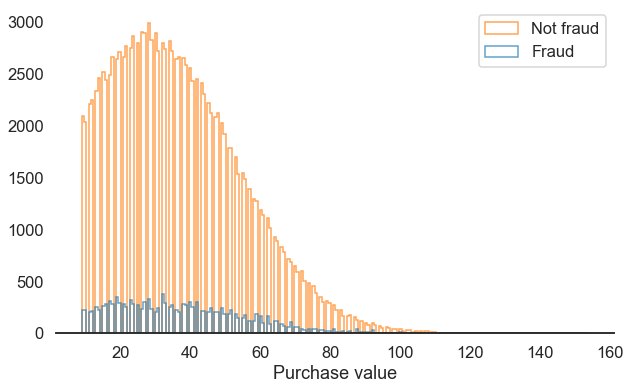

In [346]:
# # sns.set_context("talk", font_scale=1)
# sns.set_style("white")
# plt.rc('text', usetex=False)
# fig, ax = plt.subplots(figsize=(10,6))
# sns.despine(left=True)

# # mats=dict()
# value1=df[mask1]['purchase_value']
# value2=df[mask2]['purchase_value']
# N=max(value1 + value1)

# binsize = N
# B=['Fraud','Not fraud']

# ax.hist([value1, value2], binsize, histtype='step', 
#         align='mid', label=B, alpha=0.7)

# ax.set_xlabel('Purchase value')
# ax.get_yaxis().set_visible(True)
# ax.legend()
# plt.show()

It seems that 20-40 are most popular fraud target purchase value.

**Lets categorize source of access**

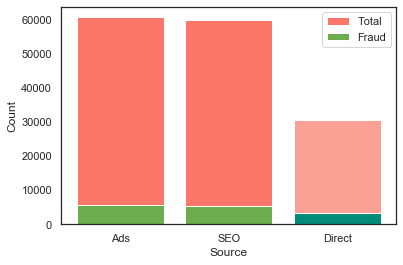

In [19]:
sns.set(style="white")

total_source=df['source'].value_counts()

mask=df['class']==1
unique_source=df[mask]['source'].value_counts()

names=unique_source.index
values=[total_source[0],
        unique_source[0],
        total_source[1],
        unique_source[1],
        total_source[2],
        unique_source[2]
       ]

plt.bar(names[0], values[0], color="#FC766AFF")
plt.bar(names[0], values[1], color="#6DAC4FFF")

plt.bar(names[1], values[2], color="#FC766AFF")
plt.bar(names[1], values[3], color="#6DAC4FFF")

plt.bar(names[2], values[4], color="#FAA094FF")
plt.bar(names[2], values[5], color="#008C76FF")

plt.ylabel("Count")
plt.xlabel("Source")
plt.legend(["Total","Fraud"])

plt.show()

# Soft Pink (#FFDDE2FF), Peach Amber (#FAA094FF), Yucca (#FC766AFF) and Arbor Green (#008C76FF)
# Dark Green (#0A5E2AFF), Light Green (#6DAC4FFF), Star White (#EFEFE8FF) and Red (#FE0000FF)

Fraudsters are mostly coming from Ads and SEO. Directly accessing fraudesters are minority here.

**What kind of browser fraudsters are using?**

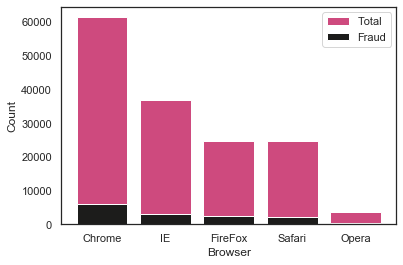

In [101]:
total_browsers=df['browser'].value_counts()

mask=df['class']==1
unique_browsers=df[mask]['browser'].value_counts()
names=unique_browser.index
values=[total_browsers[0],
        unique_browsers[0],
        total_browsers[1],
        unique_browsers[1],
        total_browsers[2],
        unique_browsers[2],
        total_browsers[3],
        unique_browsers[3],
        total_browsers[4],
        unique_browsers[4]
       ]

plt.bar(names[0], values[0], color="#CE4A7EFF")
plt.bar(names[0], values[1], color="#1C1C1BFF")
plt.bar(names[1], values[2], color="#CE4A7EFF")
plt.bar(names[1], values[3], color="#1C1C1BFF")
plt.bar(names[2], values[4], color="#CE4A7EFF")
plt.bar(names[2], values[5], color="#1C1C1BFF")
plt.bar(names[3], values[6], color="#CE4A7EFF")
plt.bar(names[3], values[7], color="#1C1C1BFF")
plt.bar(names[4], values[8], color="#CE4A7EFF")
plt.bar(names[4], values[9], color="#1C1C1BFF")

plt.ylabel("Count")
plt.xlabel("Browser")
plt.legend(['Total', 'Fraud'])

plt.show()

Fraudsters are using mostly Chrome, hmm. Secondly, they use Internet Explorer. For other browsers, it seems almost same. 

**Let's see the correlation of sex and age of fraudsters.**

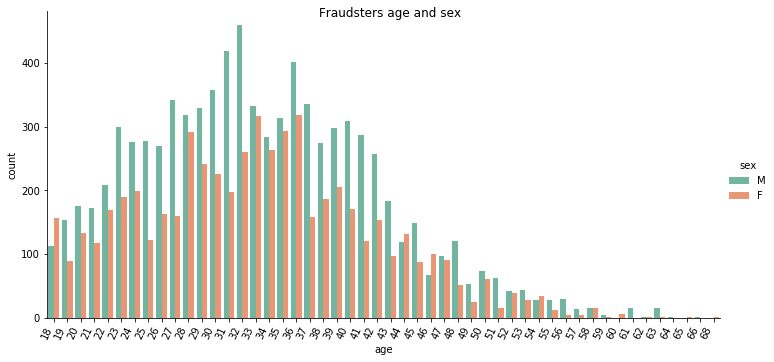

In [289]:
figure = sns.catplot(
    data=df[mask],
    x='age',
    hue='sex',
    kind='count',
    palette='Set2',
    aspect=2.0,
    legend="True"
)
figure.fig.suptitle('Fraudsters age and sex')
figure.set_xticklabels(rotation=65, horizontalalignment='right')

Most male fraudsters are early 30's, but for felames, late 30's.

# 2. Build a model that can predict whether the activity is fraudulent or not. Also explain your choices / assumptions in terms of optimizing false positives and false negatives

# 3.Your boss would like to understand your model because he is worried about using a black box model . How would you explain it from a user point, not mathematical. For example, which users can be classified as risky ?

# 4.Suppose you can use your model live to make its prediction in real time. From a Product perspective, how would you use it? How could you think of the user experience with this product?

**I want to know if there is any significance for time difference between signup time and purchase time**

In [382]:
#Get time difference in seconds:
df['signup_time_1']=df['signup_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['purchase_time_1']=df['purchase_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['duration'] = df['purchase_time_1'].sub(df['signup_time_1']).dt.total_seconds()
df.drop(columns=['signup_time','purchase_time','signup_time_1','purchase_time_1'], 
        inplace=True) #drop access time, purchase time columns

In [220]:
df

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,duration
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown,492085.0
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,5261233.0
151108,274471,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,931270.0
151109,368416,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,6681616.0
151110,207709,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,5146119.0


In [70]:
df['duration'].describe()

count    1.511120e+05
mean     4.932029e+06
std      3.126263e+06
min      1.000000e+00
25%      2.186754e+06
50%      4.926346e+06
75%      7.644525e+06
max      1.036797e+07
Name: duration, dtype: float64

In [72]:
mask1=df[mask]['duration']>1.0
mask.describe()
# sns.catplot(data=df[mask1])

count     151112
unique         2
top        False
freq      136961
Name: class, dtype: object

**As we can see here, there are 1.0 seconds duration. Let's see if it is only for visiting the page or they are also classified as a fraud.

In [221]:
mask=df['class']==1
(df[mask]['duration'] == 1.0).value_counts()

True     7600
False    6551
Name: duration, dtype: int64

It seems 7,600 cases are fraud!! More than 50%.

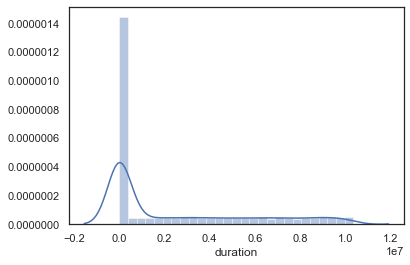

In [222]:
sns.distplot(df[mask]['duration'])

As we assumed, less than 1 seconds distribution seems high.

Let's see if user ID has any significant meaning.

In [223]:
len(df.groupby('user_id')['class'].nunique())

151112

It seems user_id is everytime unique. We have 151,112 user ID's. We can drop this column, since it doesn't include meaningful idea.

In [224]:
df.drop(columns='user_id', inplace=True)

In [227]:
len(df.groupby('ip_address')['class'].nunique())

143512

In [229]:
len(df.groupby('device_id')['class'].nunique())

137956

For the better model, we drop ip_adrres, device_id also.

In [230]:
df_1=df.drop(columns=['ip_address','device_id'], inplace=True)

In [233]:
df

,purchase_value,source,browser,sex,age,class,country,duration
0,34,SEO,Chrome,M,39,0,Japan,4506682.0
1,16,Ads,Chrome,F,53,0,United States,17944.0
2,15,SEO,Opera,M,53,1,United States,1.0
3,44,SEO,Safari,M,41,0,unknown,492085.0
4,39,Ads,Safari,M,45,0,United States,4361461.0
...,...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1,United States,5261233.0
151108,35,SEO,Safari,M,32,0,Netherlands,931270.0
151109,40,SEO,IE,F,26,0,Japan,6681616.0
151110,46,SEO,Chrome,M,37,0,United States,5146119.0


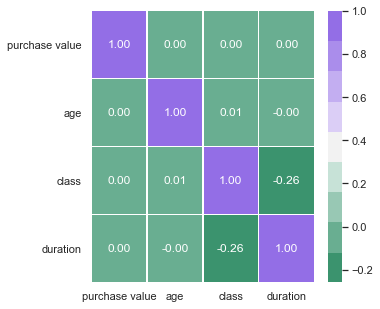

In [358]:
#Seeing feature corr

df_plot.rename(columns=
               {
                   'purchase_value':'purchase value',
                   'duration':'duration'
               },
               inplace=True)
corr = df_plot.corr()
# corr = df_plot.corr('pearson').sort_values(by='class')
fig, ax = plt.subplots(figsize=(5, 5))
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = False
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

It doesn't give us significant meaning. Unless duration seems opposite correlation with class.

# 2. Modeling

In [383]:
# Separate target variable Y from features X
df_small=df.drop(columns=['user_id', 'device_id', 'ip_address'])

target_name = 'class'

print("Separating labels from features...")
X = df_small.drop(target_name, axis=1)
y = df_small[target_name]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.values
y_train.values

X_test.values
y_test.values

Separating labels from features...


array([0, 0, 0, ..., 0, 0, 0])

In [521]:
# Create pipeline for numeric features
numeric_features = ['purchase_value', 'age', 'duration'] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['source', 'browser', 'sex', 'country'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) 
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [523]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print()

Performing preprocessings on train set...
...Done.



In [524]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print()

Performing preprocessings on test set...
...Done.



In [526]:
# Train model
randomFor = RandomForestClassifier()

parameters = {'n_estimators':range(10,50,10),
              'max_depth':range(1,5),
              'max_features':range(1,5)
             }
    
clf = GridSearchCV(estimator=randomFor, param_grid=parameters, cv=5, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=1, max_features=1, n_estimators=10 ....................
[CV]  max_depth=1, max_features=1, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=1, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=1, n_estimators=10 ....................
[CV]  max_depth=1, max_features=1, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=1, n_estimators=10 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, max_features=1, n_estimators=10, score=0.906, total=   0.1s
[CV] max_depth=1, max_features=1, n_estimators=10 ....................
[CV]  max_depth=1, max_features=1, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=1, n_estimators=20 ....................
[CV]  max_depth=1, max_features=1, n_estimators=20, score=0.907, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=20 ....................
[CV]  max_depth=1, max_features=1, n_estimators=20, score=0.907, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=20 ....................
[CV]  max_depth=1, max_features=1, n_estimators=20, score=0.907, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=20 ....................
[CV]  max_depth=1, max_features=1, n_estimators=20, score=0.906, total=   0.2s
[CV] max_depth=1, max_features=1, n_estimators=20 ....................
[CV]  max_depth=1, max_features=1, n_estimators=20, score=0.907, total=   0.2s
[CV] max_depth=1, max

[CV]  max_depth=1, max_features=3, n_estimators=40, score=0.906, total=   0.4s
[CV] max_depth=1, max_features=3, n_estimators=40 ....................
[CV]  max_depth=1, max_features=3, n_estimators=40, score=0.907, total=   0.4s
[CV] max_depth=1, max_features=4, n_estimators=10 ....................
[CV]  max_depth=1, max_features=4, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=4, n_estimators=10 ....................
[CV]  max_depth=1, max_features=4, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=4, n_estimators=10 ....................
[CV]  max_depth=1, max_features=4, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max_features=4, n_estimators=10 ....................
[CV]  max_depth=1, max_features=4, n_estimators=10, score=0.906, total=   0.1s
[CV] max_depth=1, max_features=4, n_estimators=10 ....................
[CV]  max_depth=1, max_features=4, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=1, max

[CV]  max_depth=2, max_features=2, n_estimators=30, score=0.906, total=   0.4s
[CV] max_depth=2, max_features=2, n_estimators=30 ....................
[CV]  max_depth=2, max_features=2, n_estimators=30, score=0.907, total=   0.3s
[CV] max_depth=2, max_features=2, n_estimators=40 ....................
[CV]  max_depth=2, max_features=2, n_estimators=40, score=0.907, total=   0.5s
[CV] max_depth=2, max_features=2, n_estimators=40 ....................
[CV]  max_depth=2, max_features=2, n_estimators=40, score=0.907, total=   0.5s
[CV] max_depth=2, max_features=2, n_estimators=40 ....................
[CV]  max_depth=2, max_features=2, n_estimators=40, score=0.907, total=   0.5s
[CV] max_depth=2, max_features=2, n_estimators=40 ....................
[CV]  max_depth=2, max_features=2, n_estimators=40, score=0.906, total=   0.5s
[CV] max_depth=2, max_features=2, n_estimators=40 ....................
[CV]  max_depth=2, max_features=2, n_estimators=40, score=0.907, total=   0.4s
[CV] max_depth=2, max

[CV]  max_depth=3, max_features=1, n_estimators=20, score=0.906, total=   0.3s
[CV] max_depth=3, max_features=1, n_estimators=20 ....................
[CV]  max_depth=3, max_features=1, n_estimators=20, score=0.907, total=   0.2s
[CV] max_depth=3, max_features=1, n_estimators=30 ....................
[CV]  max_depth=3, max_features=1, n_estimators=30, score=0.907, total=   0.4s
[CV] max_depth=3, max_features=1, n_estimators=30 ....................
[CV]  max_depth=3, max_features=1, n_estimators=30, score=0.907, total=   0.4s
[CV] max_depth=3, max_features=1, n_estimators=30 ....................
[CV]  max_depth=3, max_features=1, n_estimators=30, score=0.907, total=   0.4s
[CV] max_depth=3, max_features=1, n_estimators=30 ....................
[CV]  max_depth=3, max_features=1, n_estimators=30, score=0.906, total=   0.4s
[CV] max_depth=3, max_features=1, n_estimators=30 ....................
[CV]  max_depth=3, max_features=1, n_estimators=30, score=0.907, total=   0.4s
[CV] max_depth=3, max

[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.907, total=   0.2s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.907, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=20 ....................
[CV]  max_depth=3, max_features=4, n_estimators=20, score=0.907, total=   0.3s
[CV] max_depth=3, max_features=4, n_estimators=20 ....................
[CV]  max_depth=3, max_features=4, n_estimators=20, score=0.907, total=   0.3s
[CV] max_depth=3, max_features=4, n_estimators=20 ....................
[CV]  max_depth=3, max_features=4, n_estimators=20, score=0.907, total=   0.3s
[CV] max_depth=3, max_features=4, n_estimators=20 ....................
[CV]  max_depth=3, max_features=4, n_estimators=20, score=0.906, total=   0.3s
[CV] max_depth=3, max_features=4, n_estimators=20 ....................
[CV]  max_depth=3, max_features=4, n_estimators=20, score=0.907, total=   0.3s
[CV] max_depth=3, max

[CV]  max_depth=4, max_features=2, n_estimators=40, score=0.906, total=   0.5s
[CV] max_depth=4, max_features=2, n_estimators=40 ....................
[CV]  max_depth=4, max_features=2, n_estimators=40, score=0.907, total=   0.5s
[CV] max_depth=4, max_features=3, n_estimators=10 ....................
[CV]  max_depth=4, max_features=3, n_estimators=10, score=0.907, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=10 ....................
[CV]  max_depth=4, max_features=3, n_estimators=10, score=0.907, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=10 ....................
[CV]  max_depth=4, max_features=3, n_estimators=10, score=0.907, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=10 ....................
[CV]  max_depth=4, max_features=3, n_estimators=10, score=0.906, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=10 ....................
[CV]  max_depth=4, max_features=3, n_estimators=10, score=0.907, total=   0.2s
[CV] max_depth=4, max

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  1.8min finished


In [527]:
#Checking the score of train data
y_pred_RF = clf.predict(X_test)
print("Accuracy_RF:",clf.best_estimator_.score(X_test, y_test))

Accuracy_RF: 0.9057009562253913


In [528]:
print("Best parameters:",clf.best_params_)

Best parameters: {'max_depth': 3, 'max_features': 4, 'n_estimators': 10}


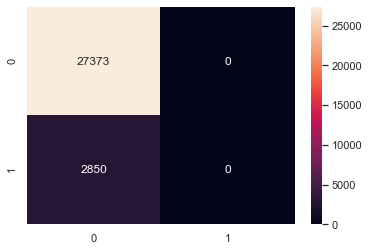

In [530]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d")

In [531]:
# Train model
logisticReg = LogisticRegression()

parameters = {
}

clf = GridSearchCV(estimator=logisticReg, param_grid=parameters, cv=5, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.907, total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.907, total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.907, total=   0.7s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=   0.7s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [532]:
#Checking the score of train data
y_pred_LR = clf.predict(X_test)
print("Accuracy_RF:",clf.best_estimator_.score(X_test, y_test))

Accuracy_RF: 0.9058663931442941


# 2. Weighting class

In [572]:
df

,purchase_value,source,browser,sex,age,class,country,duration
16987,46,SEO,FireFox,F,24,0,unknown,8175929.0
64595,56,Ads,FireFox,M,49,0,Japan,9779163.0
124205,17,Direct,FireFox,F,42,0,France,968716.0
70234,34,SEO,IE,F,55,0,United States,7314764.0
61284,29,SEO,Chrome,M,45,0,unknown,2510794.0
...,...,...,...,...,...,...,...,...
94777,18,Direct,FireFox,F,23,0,France,60395.0
2833,39,SEO,Safari,M,21,0,Poland,6354841.0
149653,40,Direct,Chrome,M,42,0,United States,3543123.0
8539,80,Ads,Chrome,M,38,0,United States,9666423.0


In [574]:
#Split the data

# df_weight=df.drop(columns=['user_id', 'device_id', 'ip_address'])
df_weight=df

target_name = 'class'

X = df_weight.drop(target_name, axis=1)
y = df_weight[target_name]

#Use get_dummies to categorical features
X=pd.get_dummies(X, drop_first=True)

# Convert pandas DataFrames to numpy arrays before using scikit-learn
# print("Convert pandas DataFrames to numpy arrays...")

#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

In [575]:
X

,purchase_value,age,duration,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Viet Nam,country_Zambia,country_minority,country_unknown
16987,46,24,8175929.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64595,56,49,9779163.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124205,17,42,968716.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70234,34,55,7314764.0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
61284,29,45,2510794.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94777,18,23,60395.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2833,39,21,6354841.0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
149653,40,42,3543123.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8539,80,38,9666423.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [583]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [584]:
# Train model
logRegress = LogisticRegression(class_weight='balanced')

parameters = {

#     'max_features':range(1,5)
}
    
clfr = GridSearchCV(estimator=logRegress, param_grid=parameters, cv=5, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.655, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.655, total=   0.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.657, total=   0.5s
[CV]  ................................................................
[CV] .................................... , score=0.652, total=   0.6s
[CV]  ................................................................
[CV] .................................... , score=0.652, total=   0.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [585]:
#Checking the score of train data
y_pred_logreg = clfr.best_estimator_.predict(X_test)
print("Accuracy_LogReg:",clfr.best_estimator_.score(X_test, y_test))

Accuracy_LogReg: 0.6520199847798035


In [586]:
k1=cohen_kappa_score(y_test, y_pred_logreg, labels=None)
print('Kappa coefficient:', k1)

Kappa coefficient: 0.14455509093946606


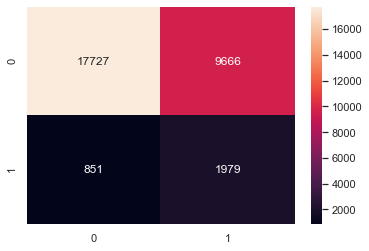

In [587]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt="d")

# 3. Balance the data

Now we will use manually ovesampling and undersampling.

In [127]:
# #Split the data
# df_small=df.drop(columns=['user_id', 'device_id', 'ip_address'])

# target_name = 'class'

# X = df_small.drop(target_name, axis=1)
# y = df_small[target_name]

# #Use get_dummies to categorical features
# X=pd.get_dummies(X, drop_first=True)

# # Convert pandas DataFrames to numpy arrays before using scikit-learn

# #Let's split data into train and test with 80%, 20% size:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

# #Let's normalize the data
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

In [128]:
# rus = RandomUnderSampler() 
# X_resampled, y_resampled = rus.fit_sample(X_train, y_train) 

# clf = LogisticRegression() 
# clf.fit(X_resampled, y_resampled)

We will use combine of undersampling and oversampling. Because it seems it works well when we combine these 2 methods at same time. First oversamples the minority class(class 1) to 10 percent of the majority class, 
under samples the majority class(class 0) to 50 percent more than the minority class.

About undersampling and oversampling:https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

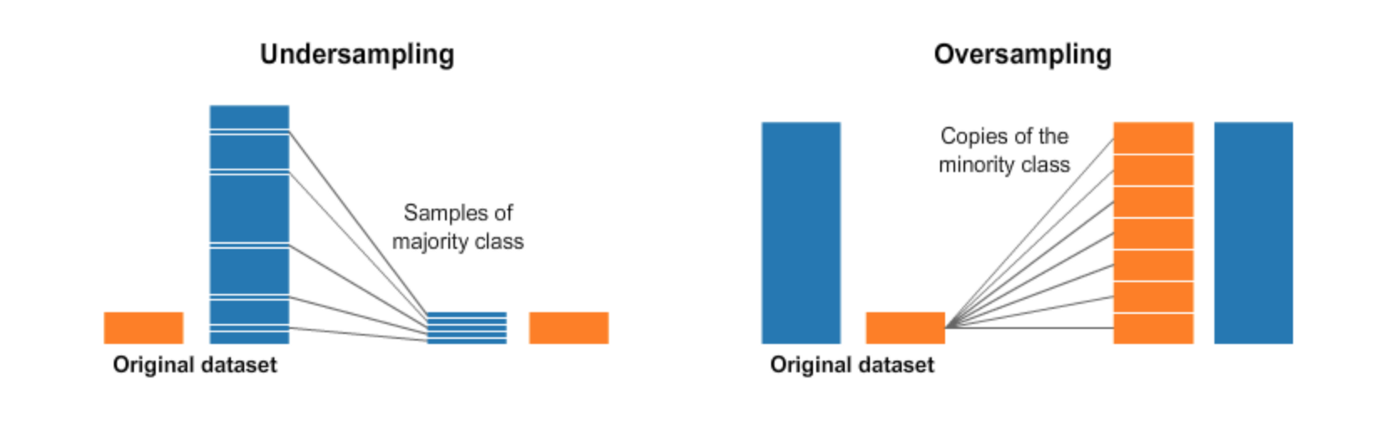

In [242]:
df

,purchase_value,source,browser,sex,age,class,country,duration
0,34,SEO,Chrome,M,39,0,Japan,4506682.0
1,16,Ads,Chrome,F,53,0,United States,17944.0
2,15,SEO,Opera,M,53,1,United States,1.0
3,44,SEO,Safari,M,41,0,unknown,492085.0
4,39,Ads,Safari,M,45,0,United States,4361461.0
...,...,...,...,...,...,...,...,...
151107,43,SEO,Chrome,M,28,1,United States,5261233.0
151108,35,SEO,Safari,M,32,0,Netherlands,931270.0
151109,40,SEO,IE,F,26,0,Japan,6681616.0
151110,46,SEO,Chrome,M,37,0,United States,5146119.0


In [401]:
# I will need sumsamples to see if our model is overfitting or not. 
#For that, first we will shuffle the data using "sample" for items randomly sampled.

df = df.sample(frac=1)

# amount of fraud classes 14151 rows.
fraud_df = df.loc[df['class'] == 1]
non_fraud_df = df.loc[df['class'] == 0][:14151]

non_nd_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_small_data = non_nd_df.sample(frac=1, random_state=42)

df_small_data.drop(columns=['user_id', 'device_id', 'ip_address'], inplace=True)

df_small_data.head()

,purchase_value,source,browser,sex,age,class,country,duration
144432,9,Direct,Chrome,F,36,1,United Arab Emirates,1.0
23023,46,SEO,IE,M,34,0,United States,5238440.0
47503,36,Direct,IE,F,47,0,United States,9440566.0
115784,10,Ads,Chrome,F,28,0,Germany,2949696.0
42376,33,Direct,Chrome,M,38,1,Brazil,1795616.0


In [403]:
df_small_data.shape

(28302, 8)

In [404]:
df_small_data['country'].nunique()

123

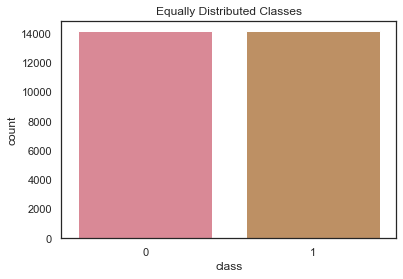

In [313]:
#Let's see our new testing data proportion

sns.countplot('class', data=df_small, palette=sns.husl_palette(9, s=0.7 ))
plt.title('Equally Distributed Classes', fontsize=12)
plt.show()

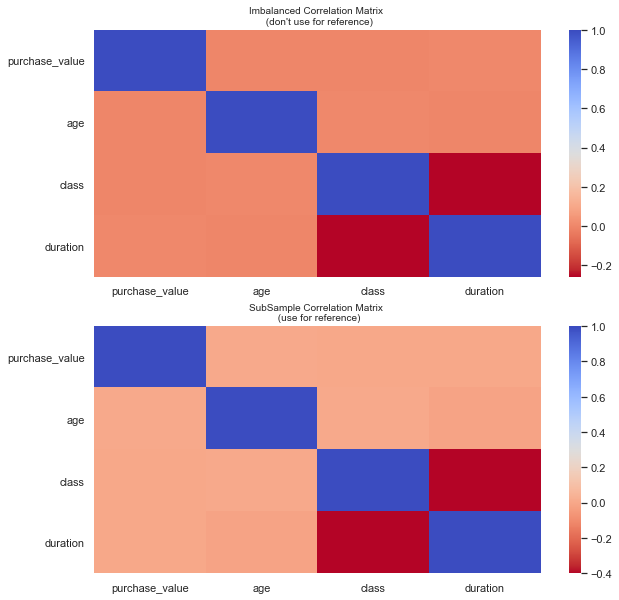

In [316]:
#Let's see corr matrix

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#Original dataset
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=10)

#New dataset
sub_sample_corr = df_small.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=10)
plt.show()

In [405]:
#Let's see PCA implementation with degree 2

X = df_small.drop('class', axis=1)
y = df_small['class']

X.values

# Create pipeline for numeric features
numeric_features = ['purchase_value', 'age', 'duration'] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['source', 'browser', 'sex', 'country'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) 
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor_new_df = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Fit and transform data first
X_data = preprocessor_new_df.fit_transform(X)

In [406]:
X_data

<28302x135 sparse matrix of type '<class 'numpy.float64'>'
	with 198114 stored elements in Compressed Sparse Row format>

In [339]:
# #PCA implementation
# X_pca = PCA(n_components=2, random_state=42).fit_transform(X_data)
# X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_data)
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_data)

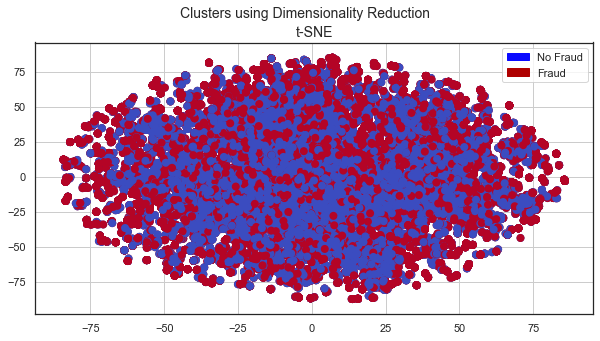

In [341]:
f, ax_svd = plt.subplots(1, figsize=(10,5))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# # TruncatedSVD scatter plot
# ax_svd.scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax_svd.scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax_svd.set_title('Truncated SVD', fontsize=14)

# t-SNE scatter plot
ax_svd.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax_svd.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax_svd.set_title('t-SNE', fontsize=14)


ax_svd.grid(True)

ax_svd.legend(handles=[blue_patch, red_patch])

plt.show()

In [135]:
#Split the data
df_small=df.drop(columns=['user_id', 'device_id', 'ip_address'])

target_name = 'class'

X = df_small.drop(target_name, axis=1)
y = df_small[target_name]

#Use get_dummies to categorical features
X=pd.get_dummies(X, drop_first=True)

#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# model:
logisticReg = LogisticRegression()

# sampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# pipeline for 2 sampling
pipeline_uo = Pipeline(steps=
                    [('o', over), 
                     ('u', under), 
                     ('m', logisticReg)
                    ])
# using GridSearch for evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# getting scores
scores = cross_val_score(estimator=pipeline_uo, X=X_train, y=y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
print('roc auc (mean): %.3f' % mean(scores))

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler(sampling_strategy=0.1)' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't

In [589]:
df_small

,purchase_value,source,browser,sex,age,class,country,duration
16174,49,SEO,Safari,M,44,1,Canada,1.0
36005,31,Ads,Chrome,F,22,0,United States,3406789.0
49819,26,SEO,Chrome,M,48,0,unknown,7421778.0
43667,37,SEO,Chrome,M,26,0,Philippines,7354320.0
122724,20,Ads,Safari,F,27,1,United Kingdom,9212044.0
...,...,...,...,...,...,...,...,...
45239,32,SEO,Chrome,F,19,0,Czech Republic,2019331.0
111483,65,Ads,IE,M,38,1,European Union,953310.0
146387,38,Direct,Chrome,M,42,1,United States,1.0
144672,40,SEO,Chrome,M,31,0,Germany,8309515.0


In [588]:
# Separate target variable Y from features X

target_name = 'class'

print("Separating labels from features...")
X = df_small.drop(target_name, axis=1)
y = df_small[target_name]

# Convert pandas DataFrames to numpy arrays before using scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.values
y_train.values

X_test.values
y_test.values

Separating labels from features...


array([0, 1, 0, ..., 0, 1, 1])

In [590]:
# Create pipeline for numeric features
numeric_features = ['purchase_value', 'age', 'duration'] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['source', 'browser', 'sex', 'country'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor_models = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [591]:
#Pre-proccesing
X_train = preprocessor_models.fit_transform(X_train)
X_test = preprocessor_models.transform(X_test)

In [592]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "Support Vector Classifier": SVC()
}

In [593]:
# Getting score:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Model: ", classifier.__class__.__name__, 
          "score of", round(training_score.mean(), 2) * 100, 
          "% acc score")

Model:  LogisticRegression score of 68.0 % acc score
Model:  RandomForestClassifier score of 74.0 % acc score
Model:  SVC score of 74.0 % acc score


Seems SVC has highset score.

In [562]:
df

,purchase_value,source,browser,sex,age,class,country,duration
16987,46,SEO,FireFox,F,24,0,unknown,8175929.0
64595,56,Ads,FireFox,M,49,0,Japan,9779163.0
124205,17,Direct,FireFox,F,42,0,France,968716.0
70234,34,SEO,IE,F,55,0,United States,7314764.0
61284,29,SEO,Chrome,M,45,0,unknown,2510794.0
...,...,...,...,...,...,...,...,...
94777,18,Direct,FireFox,F,23,0,France,60395.0
2833,39,SEO,Safari,M,21,0,Poland,6354841.0
149653,40,Direct,Chrome,M,42,0,United States,3543123.0
8539,80,Ads,Chrome,M,38,0,United States,9666423.0


In [564]:
#4 For XGBoost 

# Separate target variable Y from features X

target_name = 'class'

print("Separating labels from features...")
X = df_small.drop(target_name, axis=1)
y = df_small[target_name]


Separating labels from features...


In [565]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pre-proccesing
X_train = preprocessor_models.fit_transform(X_train)
X_test = preprocessor_models.transform(X_test)

xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, class_weight={0:1,1:20})

xgboost.fit(X_train, y_train)
preds_xgb = xgboost.predict(X_test)

accuracy = (preds_xgb == y_test).sum().astype(float) / len(preds_xgb)*100

print("XGBoost's prediction: %3.2f" % (accuracy))

XGBoost's prediction: 76.79


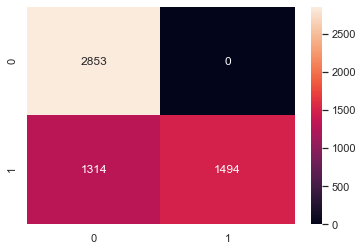

In [566]:
#Confusion matrix
cm = confusion_matrix(y_test, preds_xgb)
sns.heatmap(cm, annot=True, fmt="d")

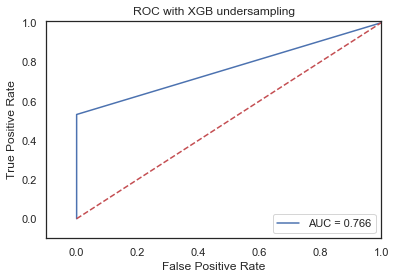

In [569]:
# y_pred_xgb = tmp.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, preds_xgb)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('ROC with XGB undersampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [453]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

KeyboardInterrupt: 

In [ ]:
# We will undersample during cross validating
undersample_X = df.drop('class', axis=1)
undersample_y = df['class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

# 3. Oversampling with SMOTE

In [521]:
# Separate target variable Y from features X

target_name = 'class'
df_small.drop(columns=['user_id', 'device_id', 'ip_address'], inplace=True)

print("Separating labels from features...")
X = df_small.drop(target_name, axis=1)
y = df_small[target_name]

# # Convert pandas DataFrames to numpy arrays before using scikit-learn

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Separating labels from features...


In [522]:
df_small

,purchase_value,source,browser,sex,age,class,country,duration
16174,49,SEO,Safari,M,44,1,Canada,1.0
36005,31,Ads,Chrome,F,22,0,United States,3406789.0
49819,26,SEO,Chrome,M,48,0,unknown,7421778.0
43667,37,SEO,Chrome,M,26,0,Philippines,7354320.0
122724,20,Ads,Safari,F,27,1,United Kingdom,9212044.0
...,...,...,...,...,...,...,...,...
45239,32,SEO,Chrome,F,19,0,Czech Republic,2019331.0
111483,65,Ads,IE,M,38,1,European Union,953310.0
146387,38,Direct,Chrome,M,42,1,United States,1.0
144672,40,SEO,Chrome,M,31,0,Germany,8309515.0


In [524]:
# Create pipeline for numeric features
numeric_features = ['purchase_value', 'age', 'duration'] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['source', 'browser', 'sex', 'country'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')) 
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor_models = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
#Pre-proccesing
X_train = preprocessor_models.fit_transform(X_train)
X_test = preprocessor_models.fit_transform(X_test)

In [ ]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm=smote.fit_sample(X,y)

In [439]:
np.bincount(y_train)

array([11298, 11343])

In [432]:
logmodel3=LogisticRegression()
r3=logmodel3.fit(X_sm, y_sm)
r3

LogisticRegression()

In [492]:
pred3=logmodel3.predict(X_sm)
accuracy3=logmodel3.score(X_sm, y_sm)
accuracy3

ValueError: could not convert string to float: 'Direct'

,purchase_value,source,browser,sex,age,class,country,duration
144432,9,Direct,Chrome,F,36,1,United Arab Emirates,1.0
23023,46,SEO,IE,M,34,0,United States,5238440.0
47503,36,Direct,IE,F,47,0,United States,9440566.0
115784,10,Ads,Chrome,F,28,0,Germany,2949696.0
42376,33,Direct,Chrome,M,38,1,Brazil,1795616.0
...,...,...,...,...,...,...,...,...
95963,62,Ads,Safari,F,35,0,Taiwan; Republic of China (ROC),8017733.0
142209,69,Ads,Opera,M,36,1,Brazil,972854.0
84418,49,Direct,IE,F,35,1,United States,2947452.0
33417,35,SEO,Chrome,M,34,0,United States,8081272.0


# 4. Oversampling 

In [534]:
df

,purchase_value,source,browser,sex,age,class,country,duration
16987,46,SEO,FireFox,F,24,0,unknown,8175929.0
64595,56,Ads,FireFox,M,49,0,Japan,9779163.0
124205,17,Direct,FireFox,F,42,0,France,968716.0
70234,34,SEO,IE,F,55,0,United States,7314764.0
61284,29,SEO,Chrome,M,45,0,unknown,2510794.0
...,...,...,...,...,...,...,...,...
94777,18,Direct,FireFox,F,23,0,France,60395.0
2833,39,SEO,Safari,M,21,0,Poland,6354841.0
149653,40,Direct,Chrome,M,42,0,United States,3543123.0
8539,80,Ads,Chrome,M,38,0,United States,9666423.0


In [535]:
#Pre-processing:

# df_o=df.drop(columns=['user_id', 'device_id', 'ip_address'], inplace=True)

X = pd.get_dummies(df.drop("class", axis=1),drop_first= True)
y = df["class"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size = 0.25
                                                   )
# We normalise X_train et X_test with StandardScalar

StdS_o = StandardScaler()

X_train = StdS_o.fit_transform(X_train)
X_test = StdS_o.transform(X_test)

In [536]:
#Now oversampling with SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 10613
Before OverSampling, counts of label '0': 102721 

After OverSampling, the shape of train_X: (205442, 136)
After OverSampling, the shape of train_y: (205442,) 

After OverSampling, counts of label '1': 102721
After OverSampling, counts of label '0': 102721


In [538]:
X_train_res

array([[ 0.65496104, -1.17677454, -0.54694916, ..., -0.00664224,
        -0.03362562, -0.41299387],
       [ 0.38256913, -0.01554535, -0.98903572, ..., -0.00664224,
        -0.03362562,  2.42134347],
       [-0.70699848, -0.01554535, -0.14961247, ..., -0.00664224,
        -0.03362562, -0.41299387],
       ...,
       [ 0.81839618,  0.68119216, -1.5785583 , ..., -0.00664224,
        -0.03362562, -0.41299387],
       [ 0.03082691, -0.51671576, -1.28742563, ..., -0.00664224,
        -0.03362562, -0.41299387],
       [-0.924912  , -0.9445287 , -1.5785583 , ..., -0.00664224,
        -0.03362562, -0.41299387]])

In [542]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   17.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [543]:
clf.best_params_


{'C': 8.0}

In [547]:
lr1 = LogisticRegression(C=8,penalty='l1', verbose=3, solver='liblinear')
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=8, penalty='l1', solver='liblinear', verbose=3)

In [549]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [594]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall in dataset: {}%".format(cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

ValueError: X has 134 features per sample; expecting 136

Recall metric in the testing dataset: 68.85245901639344%


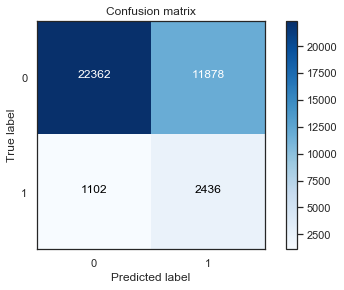

In [551]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [552]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())


[LibLinear]

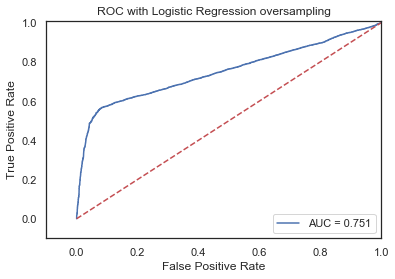

In [559]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('ROC with Logistic Regression oversampling')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()